<a href="https://colab.research.google.com/github/celacarney/Linear-Algebra-Projects/blob/main/EdinaHomePrices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
#load tidyverse package
library(tidyverse)

In [4]:
# Reading data in from COLAB file system
EdinaHomePrices <- read_csv("/content/redfin_edina_data.csv")

Rows: 115 Columns: 20
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (8): SALETYPE, PROPERTYTYPE, ADDRESS, CITY, STATE, LOCATION, URL, SOURCE
dbl (12): ZIPCODE, PRICE, BEDS, BATHS, SQUAREFEET, LOTSIZE, YEARBUILT, DAYSO...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [5]:
#Look at data
head(EdinaHomePrices)

SALETYPE,PROPERTYTYPE,ADDRESS,CITY,STATE,ZIPCODE,PRICE,BEDS,BATHS,LOCATION,SQUAREFEET,LOTSIZE,YEARBUILT,DAYSONMARKET,$/SQUARE FEET,HOA/MONTH,URL,SOURCE,LATITUDE,LONGITUDE
<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>
MLS Listing,Single Family Residential,5621 Chowen Ave S,Edina,MN,55410,1199000,5,4,Edina,3377,8189,2016,1,355,NA,https://www.redfin.com/MN/Edina/5621-Chowen-Ave-S-55410/home/49922668,NORTHSTARMLS,44.90073,-93.32486
MLS Listing,Single Family Residential,4229 Grimes Ave S,Edina,MN,55416,2295000,4,4,Edina,3685,10018,2023,2,623,NA,https://www.redfin.com/MN/Minneapolis/4229-Grimes-Ave-S-55416/home/50153504,NORTHSTARMLS,44.92493,-93.33387
MLS Listing,Single Family Residential,7113 Cornelia Dr,Edina,MN,55435,648000,4,3,Edina,2166,10454,1963,4,299,NA,https://www.redfin.com/MN/Minneapolis/7113-Cornelia-Dr-55435/home/51489411,NORTHSTARMLS,44.87432,-93.33555
MLS Listing,Single Family Residential,7208 Fleetwood Dr,Edina,MN,55439,1200000,6,4,Edina,4007,13939,1973,4,299,NA,https://www.redfin.com/MN/Minneapolis/7208-Fleetwood-Dr-55439/home/51328170,NORTHSTARMLS,44.87218,-93.37105
MLS Listing,Single Family Residential,312 Harrison Ave S,Edina,MN,55343,329900,3,2,Edina,1223,6969,1946,4,270,NA,https://www.redfin.com/MN/Hopkins/312-Harrison-Ave-S-55343/home/51486270,NORTHSTARMLS,44.91962,-93.39256
MLS Listing,Single Family Residential,6305 Concord Ave,Edina,MN,55424,798500,4,3,Edina,2544,9583,1957,4,314,NA,https://www.redfin.com/MN/Edina/6305-Concord-Ave-55424/home/51483022,NORTHSTARMLS,44.88867,-93.34389


**1. Fit The Model**

Price ~ Square Feet

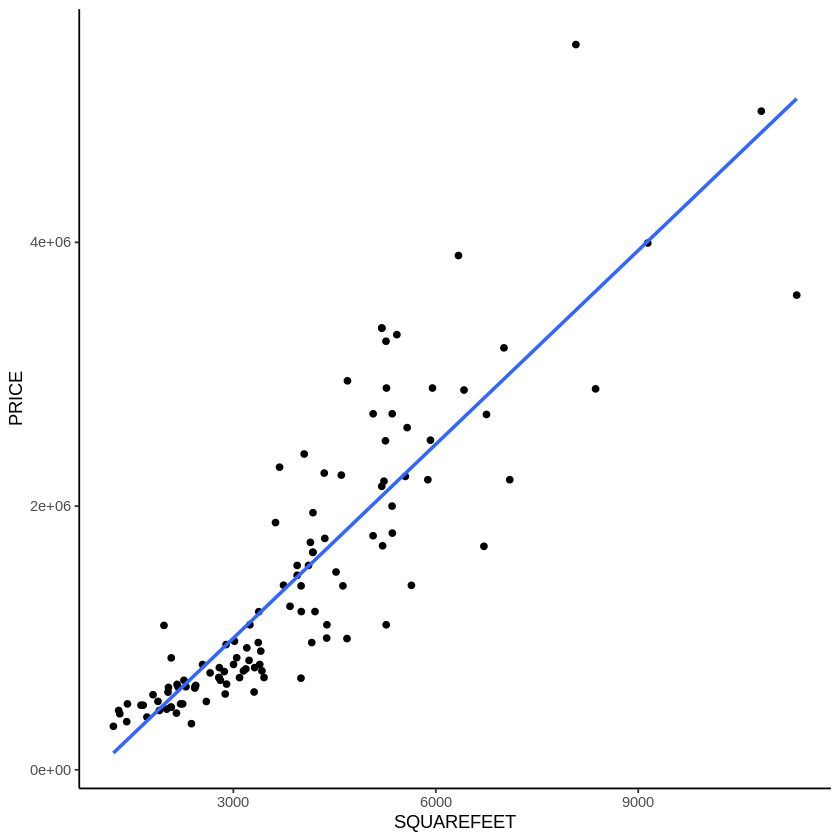

In [6]:
#Scatterplot with simple linear regression line
ggplot(data=EdinaHomePrices, aes(x=SQUAREFEET,y=PRICE)) + 
  geom_point() +    #adding the points to the plot
  geom_smooth(method='lm', formula = y ~ x, se=FALSE) +  #adding a regression line to the plot without the standard error bands 
  theme_classic()

1. Interpret y intercept and slope.

      the y intercept represents the base price/ lot price for homes in Edina, MN. The slope represents the general trend of price per square feet.
2.Interpret R^2 and RMSE values. 

R^2 value is .75, this tells us that 75% of our data can be explained by the model. RMSE is $520,600 is how much, in general we are off. In conclusion, our model is not that great.

In [7]:
#Fitting the simple linear regression model in R
LM_Price_SquareFeet <- lm(PRICE ~ SQUAREFEET, data = EdinaHomePrices)

In [8]:
# Minimal information is provided for a model object
LM_Price_SquareFeet


Call:
lm(formula = PRICE ~ SQUAREFEET, data = EdinaHomePrices)

Coefficients:
(Intercept)   SQUAREFEET  
  -471836.9        490.1  


In [9]:
# Using the summary() helper function to get additional information 
# on the model object
summary(LM_Price_SquareFeet)


Call:
lm(formula = PRICE ~ SQUAREFEET, data = EdinaHomePrices)

Residuals:
     Min       1Q   Median       3Q      Max 
-1489894  -283559   -24528   161952  2013735 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -471836.89  112966.36  -4.177 5.84e-05 ***
SQUAREFEET      490.11      25.92  18.905  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 520600 on 113 degrees of freedom
Multiple R-squared:  0.7598,	Adjusted R-squared:  0.7577 
F-statistic: 357.4 on 1 and 113 DF,  p-value: < 2.2e-16


Getting the Predicted Values.

In [10]:
(EdinaHomePrices
 %>% mutate(
            Predicted_PRICE = predict(LM_Price_SquareFeet, newdata = EdinaHomePrices)
           )
 %>% select(ADDRESS, CITY, STATE, PRICE, Predicted_PRICE, BEDS, BATHS, SQUAREFEET, LOTSIZE, YEARBUILT, URL)
) -> EdinaHomePrices_with_Predicted

head(EdinaHomePrices_with_Predicted)

ADDRESS,CITY,STATE,PRICE,Predicted_PRICE,BEDS,BATHS,SQUAREFEET,LOTSIZE,YEARBUILT,URL
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
5621 Chowen Ave S,Edina,MN,1199000,1183253.6,5,4,3377,8189,2016,https://www.redfin.com/MN/Edina/5621-Chowen-Ave-S-55410/home/49922668
4229 Grimes Ave S,Edina,MN,2295000,1334206.5,4,4,3685,10018,2023,https://www.redfin.com/MN/Minneapolis/4229-Grimes-Ave-S-55416/home/50153504
7113 Cornelia Dr,Edina,MN,648000,589734.3,4,3,2166,10454,1963,https://www.redfin.com/MN/Minneapolis/7113-Cornelia-Dr-55435/home/51489411
7208 Fleetwood Dr,Edina,MN,1200000,1492020.9,6,4,4007,13939,1973,https://www.redfin.com/MN/Minneapolis/7208-Fleetwood-Dr-55439/home/51328170
312 Harrison Ave S,Edina,MN,329900,127563.7,3,2,1223,6969,1946,https://www.redfin.com/MN/Hopkins/312-Harrison-Ave-S-55343/home/51486270
6305 Concord Ave,Edina,MN,798500,774994.7,4,3,2544,9583,1957,https://www.redfin.com/MN/Edina/6305-Concord-Ave-55424/home/51483022


**2. Plot Actual v. Predicted**

Warning message:
“Removed 94 rows containing non-finite values (stat_smooth).”
Warning message:
“Removed 94 rows containing missing values (geom_point).”


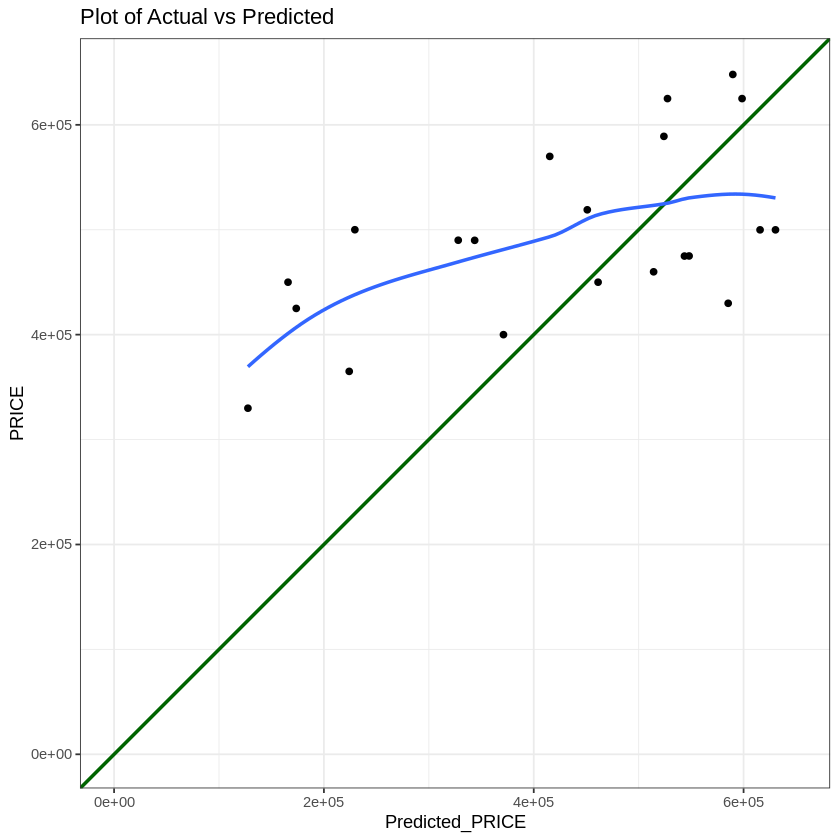

In [11]:
#Scatterplot with simple linear regression line
ggplot(data=EdinaHomePrices_with_Predicted, aes(x=Predicted_PRICE, y=PRICE)) + 
  geom_point() +    #adding the points to the plot
  geom_abline(intercept = 0, slope = 1, col="darkgreen", size=1) +   # adding a y=x reference line
  geom_smooth(method='loess', formula = y ~ x, se=FALSE) +  #adding a loess smoother to identify patterns
  
  # Deal with scaling the plot appropriately
  coord_fixed(ratio = 1) +    # Force the plot to be square, i.e. aspect ratio = 1
  xlim(0,650000) +            # Set the limits on the x-axis (should match the y-axis)
  ylim(0,650000) +            # Set the limits on the y-axis (should match the x-axis)
  
  ggtitle("Plot of Actual vs Predicted") +   #Add a title to the plot
  
  theme_bw()

In [12]:
(EdinaHomePrices_with_Predicted
 %>% mutate(
            Residual = (PRICE - Predicted_PRICE)
           )
 %>% select(ADDRESS, CITY, STATE, PRICE, Predicted_PRICE, Residual, BEDS, BATHS, SQUAREFEET, LOTSIZE, YEARBUILT, URL)
) -> EdinaHomePrices_with_Predicted_and_Residuals

head(EdinaHomePrices_with_Predicted_and_Residuals)

ADDRESS,CITY,STATE,PRICE,Predicted_PRICE,Residual,BEDS,BATHS,SQUAREFEET,LOTSIZE,YEARBUILT,URL
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
5621 Chowen Ave S,Edina,MN,1199000,1183253.6,15746.40,5,4,3377,8189,2016,https://www.redfin.com/MN/Edina/5621-Chowen-Ave-S-55410/home/49922668
4229 Grimes Ave S,Edina,MN,2295000,1334206.5,960793.52,4,4,3685,10018,2023,https://www.redfin.com/MN/Minneapolis/4229-Grimes-Ave-S-55416/home/50153504
7113 Cornelia Dr,Edina,MN,648000,589734.3,58265.67,4,3,2166,10454,1963,https://www.redfin.com/MN/Minneapolis/7113-Cornelia-Dr-55435/home/51489411
7208 Fleetwood Dr,Edina,MN,1200000,1492020.9,-292020.85,6,4,4007,13939,1973,https://www.redfin.com/MN/Minneapolis/7208-Fleetwood-Dr-55439/home/51328170
312 Harrison Ave S,Edina,MN,329900,127563.7,202336.34,3,2,1223,6969,1946,https://www.redfin.com/MN/Hopkins/312-Harrison-Ave-S-55343/home/51486270
6305 Concord Ave,Edina,MN,798500,774994.7,23505.32,4,3,2544,9583,1957,https://www.redfin.com/MN/Edina/6305-Concord-Ave-55424/home/51483022


Warning message:
“Removed 63 rows containing non-finite values (stat_smooth).”
Warning message:
“Removed 63 rows containing missing values (geom_point).”
Warning message:
“Removed 1 rows containing missing values (geom_smooth).”


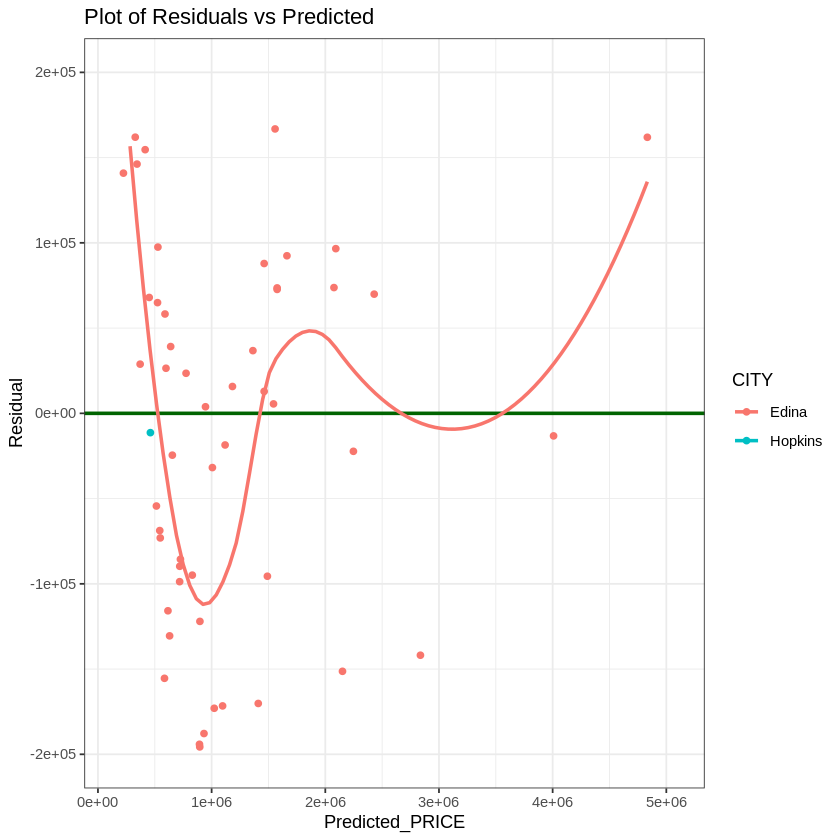

In [13]:
#Scatterplot with simple linear regression line
ggplot(data=EdinaHomePrices_with_Predicted_and_Residuals, aes(x=Predicted_PRICE, y=Residual, col=CITY)) + 
  geom_point() +    #adding the points to the plot
  geom_abline(intercept = 0, slope = 0, color="darkgreen", size=1) +   # adding a y=0 reference line
  geom_smooth(method='loess', formula = y ~ x, se=FALSE) +  #adding a loess smoother to identify patterns in Residuals
  
  # Make the y-axis symmetric about 0
  ylim(-200000,200000) + 

  ggtitle("Plot of Residuals vs Predicted") +   #Add a title to the plot
  
  theme_bw()

**3. Plot Residual v. Predicted**

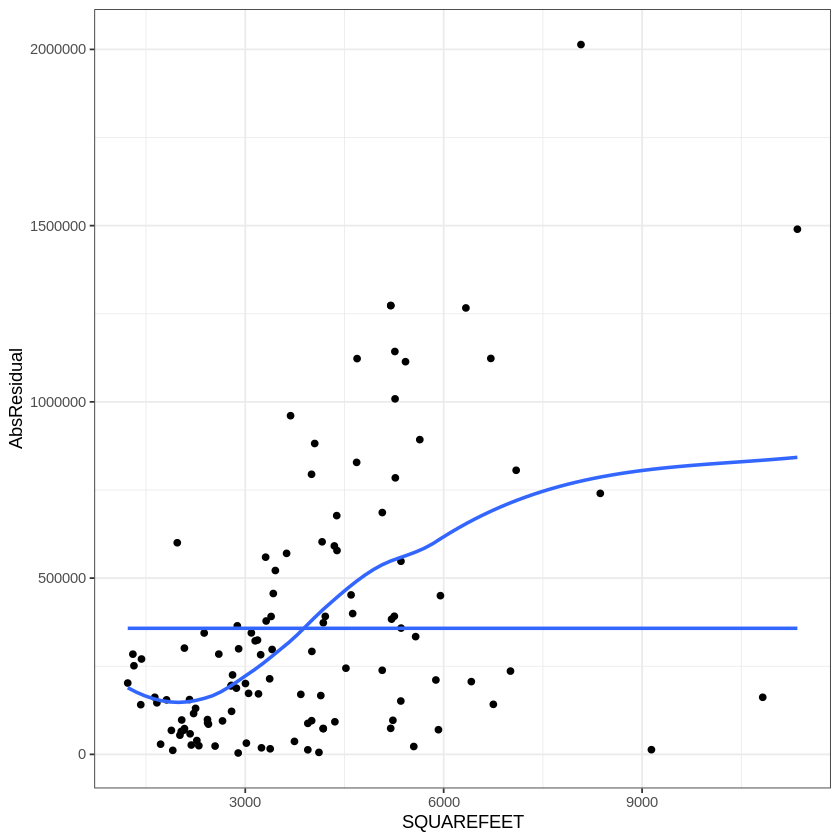

In [14]:
#Computing the |Residual| values and putting these value into a data.frame.
(EdinaHomePrices_with_Predicted
 %>% mutate(
            Residual = (PRICE - Predicted_PRICE),
            AbsResidual = abs(Residual)
           )
) -> EdinaHomePrices_with_Predicted_and_AbsResiduals

#Creating a scatterplot of |Residual| vs Square Feet
ggplot(data=EdinaHomePrices_with_Predicted_and_AbsResiduals, aes(x=SQUAREFEET, y=AbsResidual)) + 
  geom_point() +   
  geom_smooth(method='loess', formula = y ~ x, se=FALSE) +  #adding a loess smoother to identify patterns in Residuals
  geom_smooth(method='lm', formula = y ~ 1, se=FALSE) +     #add horizontal line at average |Residual| value.
  theme_bw()
